In [1]:
!unzip dog_images.zip

Archive:  dog_images.zip
   creating: images/
  inflating: images/.DS_Store        
   creating: images/beagle/
  inflating: images/beagle/n02088364_12397.jpg  
  inflating: images/beagle/n02088364_14095.jpg  
  inflating: images/beagle/n02088364_8871.jpg  
  inflating: images/beagle/n02088364_12816.jpg  
  inflating: images/beagle/n02088364_6109.jpg  
  inflating: images/beagle/n02088364_1128.jpg  
  inflating: images/beagle/n02088364_12745.jpg  
  inflating: images/beagle/n02088364_17167.jpg  
  inflating: images/beagle/n02088364_9825.jpg  
  inflating: images/beagle/n02088364_14863.jpg  
  inflating: images/beagle/n02088364_16721.jpg  
  inflating: images/beagle/n02088364_2019.jpg  
  inflating: images/beagle/n02088364_4052.jpg  
  inflating: images/beagle/n02088364_16695.jpg  
  inflating: images/beagle/n02088364_5826.jpg  
  inflating: images/beagle/n02088364_8443.jpg  
  inflating: images/beagle/n02088364_14055.jpg  
  inflating: images/beagle/n02088364_12154.jpg  
  inflating: i

In [2]:
breeds=['beagle', 'bernese_mountain_dog', 'doberman', 'labrador_retriever', 'siberian_husky']

In [3]:
import tensorflow as tf

In [4]:
args={
    'labels': 'inferred',
    'label_mode': 'categorical',
    'batch_size': 32,
    'image_size': (256,256),
    'seed': 70,
    'validation_split': .2,
    'class_names': breeds
}

In [5]:
train=tf.keras.utils.image_dataset_from_directory(
    'images',
    subset='training',
    **args
)

Found 926 files belonging to 5 classes.
Using 741 files for training.


In [6]:
test=tf.keras.utils.image_dataset_from_directory(
    'images',
    subset='validation',
    **args
)

Found 926 files belonging to 5 classes.
Using 185 files for validation.


In [7]:
train

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [8]:
first=train.take(1)
first

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [9]:
images, labels=list(first)[0]

In [10]:
from PIL import Image

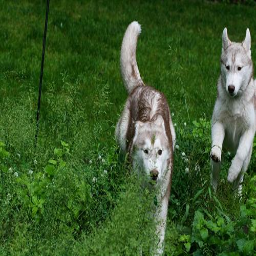

In [11]:
Image.fromarray(images[0].numpy().astype("uint8"))

In [12]:
labels[0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 1.], dtype=float32)>

In [13]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [15]:
model=Sequential([
                  layers.Rescaling(1./255),
                  layers.Conv2D(16,3,strides=(1,1),padding="same",activation='relu',input_shape=(256,256,3)),
                  layers.Flatten(),
                  layers.Dense(128,activation='relu'),
                  layers.Dense(len(breeds)),
                  
])

In [28]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [29]:
history=model.fit(
    train,
    validation_data=test,
    epochs=10,
    verbose=1
)

Epoch 1/10
24/24 [==============================] - 51s 2s/step - loss: 82.9712 - accuracy: 0.2132 - val_loss: 4.7198 - val_accuracy: 0.3189
Epoch 2/10
24/24 [==============================] - 44s 2s/step - loss: 2.7230 - accuracy: 0.3441 - val_loss: 1.7545 - val_accuracy: 0.3189
Epoch 3/10
24/24 [==============================] - 45s 2s/step - loss: 1.3796 - accuracy: 0.4750 - val_loss: 1.5673 - val_accuracy: 0.3351
Epoch 4/10
24/24 [==============================] - 44s 2s/step - loss: 1.1172 - accuracy: 0.6437 - val_loss: 1.5112 - val_accuracy: 0.3892
Epoch 5/10
24/24 [==============================] - 45s 2s/step - loss: 0.8421 - accuracy: 0.7814 - val_loss: 1.5032 - val_accuracy: 0.4054
Epoch 6/10
24/24 [==============================] - 44s 2s/step - loss: 0.5143 - accuracy: 0.9028 - val_loss: 1.5776 - val_accuracy: 0.4054
Epoch 7/10
24/24 [==============================] - 45s 2s/step - loss: 0.2901 - accuracy: 0.9636 - val_loss: 1.6975 - val_accuracy: 0.4162
Epoch 8/10
24/24 [=

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 128)               134217856 
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 134,218,949
Trainable params: 134,218,949
Non-trainable params: 0
_________________________________________________________________


In [16]:
import pandas as pd

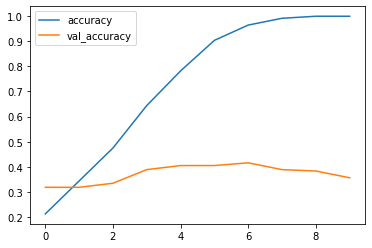

In [33]:
history_df=pd.DataFrame.from_dict(history.history)
history_df[['accuracy','val_accuracy']].plot()

In [17]:
def train_model(network, ep=5):
  model=Sequential(network)
  model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history=model.fit(
    train,
    validation_data=test,
    epochs=ep,
    verbose=1)
  history_df=pd.DataFrame.from_dict(history.history)
  return history_df, model

In [18]:
network=[
                  layers.Rescaling(1./255),
                  layers.Conv2D(16,4,strides=(1,1),padding="same",activation='relu',input_shape=(256,256,3)),
                  layers.MaxPooling2D(),
                  layers.Conv2D(32,4,strides=(1,1),padding="same",activation='relu',input_shape=(256,256,3)),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64,4,strides=(1,1),padding="same",activation='relu',input_shape=(256,256,3)),
                  layers.MaxPooling2D(),
                  layers.Dropout(.2),
                  layers.Flatten(),
                  layers.Dense(128,activation='relu'),
                  layers.Dense(len(breeds)),
                  
]

In [19]:
history_df, model=train_model(network)

Epoch 1/5
24/24 [==============================] - 78s 3s/step - loss: 1.7915 - accuracy: 0.2119 - val_loss: 1.6062 - val_accuracy: 0.2216
Epoch 2/5
24/24 [==============================] - 75s 3s/step - loss: 1.5831 - accuracy: 0.2389 - val_loss: 1.5777 - val_accuracy: 0.2324
Epoch 3/5
24/24 [==============================] - 74s 3s/step - loss: 1.4273 - accuracy: 0.3995 - val_loss: 1.5647 - val_accuracy: 0.3784
Epoch 4/5
24/24 [==============================] - 75s 3s/step - loss: 1.0720 - accuracy: 0.5857 - val_loss: 1.8670 - val_accuracy: 0.3405
Epoch 5/5
24/24 [==============================] - 75s 3s/step - loss: 0.6912 - accuracy: 0.7503 - val_loss: 2.0396 - val_accuracy: 0.3243


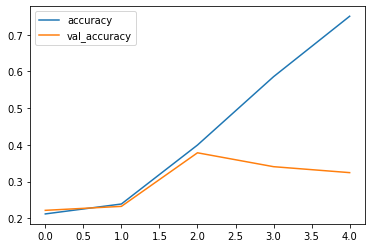

In [20]:
history_df[['accuracy','val_accuracy']].plot()

In [26]:
data_aug=tf.keras.Sequential([
 layers.RandomFlip('horizontal',seed=71),
 layers.RandomRotation(.2, seed=71),
 layers.RandomZoom(.2, seed=71)
])

In [27]:
full_network=[data_aug]+network

In [28]:
history_df, model=train_model(full_network,10)

Epoch 1/10
24/24 [==============================] - 83s 3s/step - loss: 1.2640 - accuracy: 0.4804 - val_loss: 1.3103 - val_accuracy: 0.4432
Epoch 2/10
24/24 [==============================] - 82s 3s/step - loss: 1.1989 - accuracy: 0.5223 - val_loss: 1.3599 - val_accuracy: 0.4541
Epoch 3/10
24/24 [==============================] - 81s 3s/step - loss: 1.1344 - accuracy: 0.5655 - val_loss: 1.4722 - val_accuracy: 0.4757
Epoch 4/10
24/24 [==============================] - 81s 3s/step - loss: 1.1697 - accuracy: 0.5358 - val_loss: 1.4889 - val_accuracy: 0.4432
Epoch 5/10
24/24 [==============================] - 80s 3s/step - loss: 1.1067 - accuracy: 0.5587 - val_loss: 1.4138 - val_accuracy: 0.4757
Epoch 6/10
24/24 [==============================] - 81s 3s/step - loss: 1.1391 - accuracy: 0.5614 - val_loss: 1.3249 - val_accuracy: 0.4649
Epoch 7/10
24/24 [==============================] - 81s 3s/step - loss: 1.0620 - accuracy: 0.5803 - val_loss: 1.3143 - val_accuracy: 0.4703
Epoch 8/10
24/24 [==

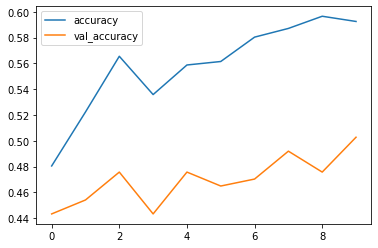

In [29]:
history_df[['accuracy','val_accuracy']].plot()

In [45]:
# How to Import an image
from google.colab import files
import matplotlib.pyplot as plt

# Select file from Local Drive
uploaded = files.upload()

# Convert uploaded image into uint type
img = plt.imread('doggo (1).jpg')

Saving doggo (1).jpg to doggo (1).jpg


In [46]:
img

array([[[ 81,  73,  62],
        [ 81,  73,  62],
        [ 79,  70,  61],
        ...,
        [ 46,  38,  35],
        [ 42,  34,  31],
        [ 33,  25,  22]],

       [[ 82,  74,  63],
        [ 81,  73,  62],
        [ 79,  70,  61],
        ...,
        [ 45,  37,  34],
        [ 39,  31,  28],
        [ 33,  25,  22]],

       [[ 83,  75,  64],
        [ 80,  72,  61],
        [ 77,  68,  59],
        ...,
        [ 34,  26,  23],
        [ 27,  19,  16],
        [ 26,  18,  15]],

       ...,

       [[231, 212, 195],
        [233, 214, 197],
        [239, 220, 203],
        ...,
        [229, 212, 196],
        [230, 213, 197],
        [227, 210, 194]],

       [[231, 212, 195],
        [230, 211, 194],
        [237, 218, 201],
        ...,
        [230, 213, 197],
        [232, 215, 199],
        [233, 216, 200]],

       [[230, 211, 194],
        [225, 206, 189],
        [234, 215, 198],
        ...,
        [226, 209, 193],
        [229, 212, 196],
        [233, 216, 200]]

In [48]:
import numpy as np
img=np.reshape(img,(-1,256,256,3))
prediction=model.predict(img)

In [49]:
prediction

array([[-0.09182937,  2.311064  ,  0.09105541,  0.9797333 ,  3.2207477 ]],
      dtype=float32)